# Arbol de decision

In [34]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from graphviz import Source

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
%matplotlib inline

print('All Done')

All Done


In [2]:
ab = pd.read_csv('../data/artists_billboard.csv', index_col=0)
ab.head()

,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
id,,,,,,,,,,
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


In [3]:
ab.shape

(635, 10)

In [4]:
tops = ab.groupby('top').size()
tops

top
0    494
1    141
dtype: int64

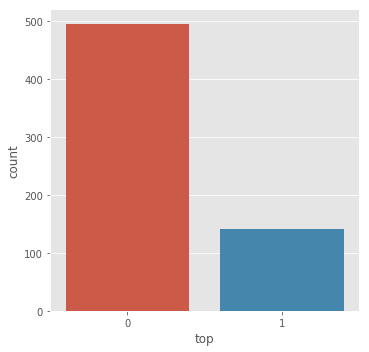

In [5]:
sns.catplot('top',data=ab, kind="count")

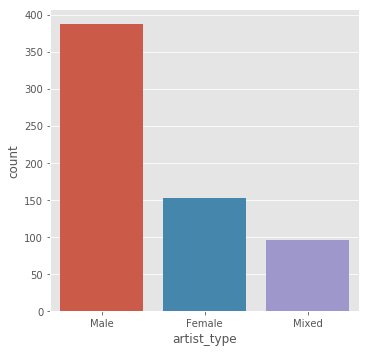

In [6]:
sns.catplot('artist_type',data=ab,kind='count')

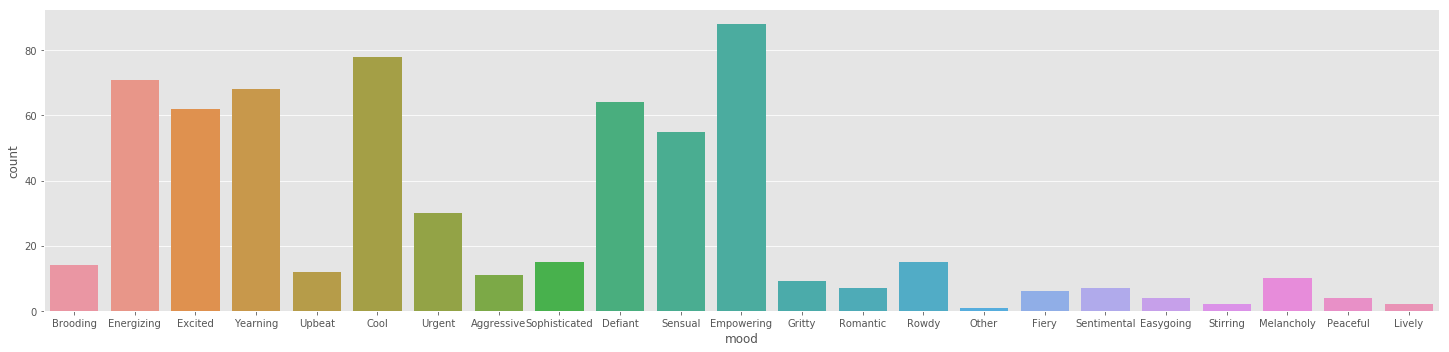

In [7]:
sns.catplot('mood',data=ab,kind='count',aspect=4)

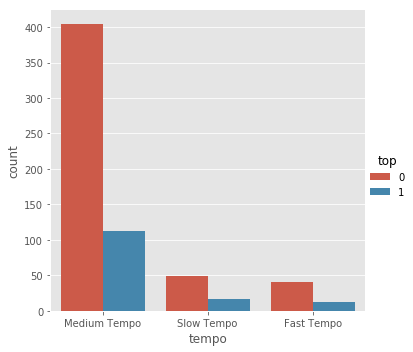

In [8]:
sns.catplot('tempo',data=ab,hue='top',kind='count')

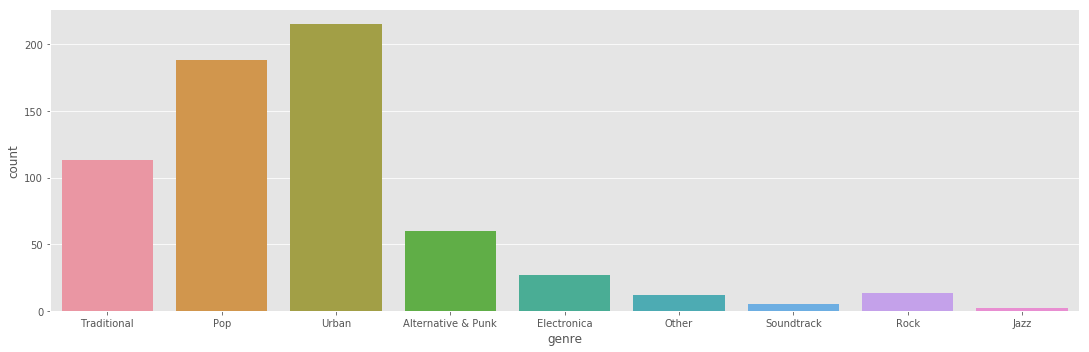

In [9]:
sns.catplot('genre',data=ab,kind='count', aspect=3)

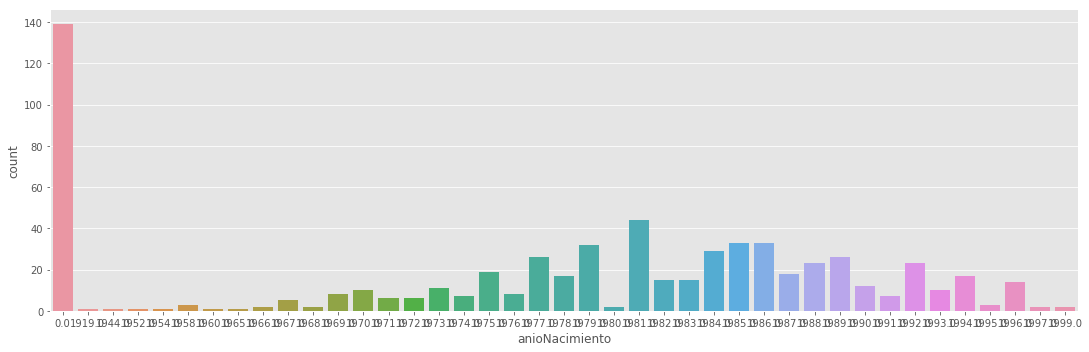

In [10]:
sns.catplot('anioNacimiento',data=ab,kind='count', aspect=3)

### Balanceo de Datos

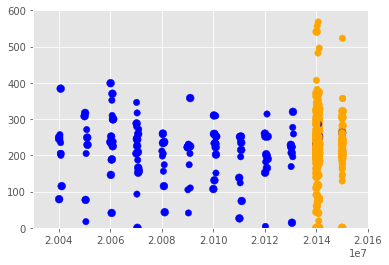

In [11]:
f1 = ab['chart_date'].values
f2 = ab['durationSeg'].values

colores = ['orange','blue']
tamanios = [60,40]

asignar = []
asignar2 = []

for index, row in ab.iterrows():
    asignar.append(colores[row['top']])
    asignar2.append(tamanios[row['top']])
    
plt.scatter(f1,f2,c=asignar, s=tamanios)
plt.axis([20030101,20160101,0,600])
plt.show()

### Preparamos los datos

#### Reemplazar los nulos por None

In [12]:
def age_fix(anio):
    if anio == 0:
        return None
    return anio

ab['anioNacimiento']=ab.apply(lambda x: age_fix(x['anioNacimiento']), axis=1)
ab.head(3)

,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
id,,,,,,,,,,
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0


#### Crearemos la columna para saber la edad

In [13]:
def calculate_edad(anio, cuando):
    cad = str(cuando)
    momento = cad[:4]
    if anio == 0.0:
        return None
    return int(momento) - anio

ab['edad_en_billboard'] = ab.apply(lambda x: calculate_edad(x['anioNacimiento'],x['chart_date']),axis=1)
ab.head(3)

,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
id,,,,,,,,,,,
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0,39.0
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0,25.0
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0,21.0


#### Asignar edades aleatorias a quienes no tengan

In [14]:
age_avg = ab['edad_en_billboard'].mean()
age_std = ab['edad_en_billboard'].std()
age_null_count = ab['edad_en_billboard'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(ab['edad_en_billboard'])

ab.loc[np.isnan(ab['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list

print('Edad promedio: ' + str(age_avg))
print('Desvio Std Edsd: ' + str(age_std))
print('Intervalo para asignar edad aleatoria: ' + str(int(age_avg - age_std)) + ' a ' + str(int(age_avg + age_std)))

Edad promedio: 30.10282258064516
Desvio Std Edsd: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


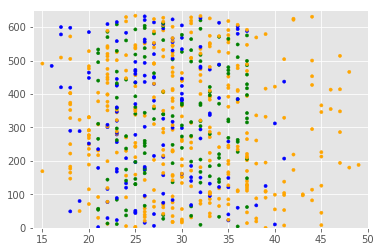

In [15]:
f1 = ab['edad_en_billboard'].values
f2 = ab.index

colores=['orange','blue','green']

asignar=[]
for index, row in ab.iterrows():
    if (conValoresNulos[index]):
        asignar.append(colores[2])
    else:
        asignar.append(colores[row['top']])

plt.scatter(f1, f2, c=asignar, s=10)
plt.axis([14,50,0,650])
plt.show()        
        

In [16]:
separador = "### ### ###"
grouped11 = ab.groupby('mood').size()#.sum().reset_index()
neworder11 = grouped11.sort_values(ascending=False)
print(neworder11)
print(separador)
print("Tempos de Canción: " + str(ab['tempo'].unique()))
print(separador)
print("Tipos de Artista: " + str(ab['artist_type'].unique()))
print(separador)
grouped11 = ab.groupby('genre').size()#.sum().reset_index()
neworder11 = grouped11.sort_values(ascending=False)
print(neworder11)

mood
Empowering       88
Cool             78
Energizing       71
Yearning         68
Defiant          64
Excited          62
Sensual          55
Urgent           30
Sophisticated    15
Rowdy            15
Brooding         14
Upbeat           12
Aggressive       11
Melancholy       10
Gritty            9
Romantic          7
Sentimental       7
Fiery             6
Peaceful          4
Easygoing         4
Lively            2
Stirring          2
Other             1
dtype: int64
### ### ###
Tempos de Canción: ['Medium Tempo' 'Slow Tempo' 'Fast Tempo']
### ### ###
Tipos de Artista: ['Male' 'Female' 'Mixed']
### ### ###
genre
Urban                 215
Pop                   188
Traditional           113
Alternative & Punk     60
Electronica            27
Rock                   13
Other                  12
Soundtrack              5
Jazz                    2
dtype: int64


In [17]:
# Mood Mapping 
ab['moodEncoded'] = ab['mood'].map( {'Energizing': 6, 
                                        'Empowering': 6,
                                        'Cool': 5, 
                                        'Yearning': 4, # anhelo, deseo, ansia
                                        'Excited': 5, #emocionado
                                        'Defiant': 3, 
                                        'Sensual': 2, 
                                        'Gritty': 3, #coraje 
                                        'Sophisticated': 4,
                                        'Aggressive': 4, # provocativo
                                        'Fiery': 4, #caracter fuerte
                                        'Urgent': 3, 
                                        'Rowdy': 4, #ruidoso alboroto
                                        'Sentimental': 4,
                                        'Easygoing': 1, # sencillo
                                        'Melancholy': 4, 
                                        'Romantic': 2, 
                                        'Peaceful': 1, 
                                        'Brooding': 4, # melancolico
                                        'Upbeat': 5, #optimista alegre
                                        'Stirring': 5, #emocionante
                                        'Lively': 5, #animado
                                        'Other': 0,'':0} ).astype(int)
# Tempo Mapping 
ab['tempoEncoded'] = ab['tempo'].map( {'Fast Tempo': 0, 'Medium Tempo': 2, 'Slow Tempo': 1, '': 0} ).astype(int)
# Genre Mapping 
ab['genreEncoded'] = ab['genre'].map( {'Urban': 4, 
                                          'Pop': 3, 
                                          'Traditional': 2, 
                                          'Alternative & Punk': 1,
                                         'Electronica': 1, 
                                          'Rock': 1, 
                                          'Soundtrack': 0, 
                                          'Jazz': 0,
                                          'Other':0,'':0} 
                                       ).astype(int)
# artist_type Mapping 
ab['artist_typeEncoded'] = ab['artist_type'].map( {'Female': 2, 'Male': 3, 'Mixed': 1, '': 0} ).astype(int)


# Mapping edad en la que llegaron al billboard
ab.loc[ ab['edad_en_billboard'] <= 21, 'edadEncoded'] = 0
ab.loc[(ab['edad_en_billboard'] > 21) & (ab['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
ab.loc[(ab['edad_en_billboard'] > 26) & (ab['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
ab.loc[(ab['edad_en_billboard'] > 30) & (ab['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
ab.loc[ ab['edad_en_billboard'] > 40, 'edadEncoded'] = 4

# Mapping Song Duration
ab.loc[ ab['durationSeg'] <= 150, 'durationEncoded'] 					       = 0
ab.loc[(ab['durationSeg'] > 150) & (ab['durationSeg'] <= 180), 'durationEncoded'] = 1
ab.loc[(ab['durationSeg'] > 180) & (ab['durationSeg'] <= 210), 'durationEncoded'] = 2
ab.loc[(ab['durationSeg'] > 210) & (ab['durationSeg'] <= 240), 'durationEncoded'] = 3
ab.loc[(ab['durationSeg'] > 240) & (ab['durationSeg'] <= 270), 'durationEncoded'] = 4
ab.loc[(ab['durationSeg'] > 270) & (ab['durationSeg'] <= 300), 'durationEncoded'] = 5
ab.loc[ ab['durationSeg'] > 300, 'durationEncoded'] = 6

In [18]:
drop_elements = ['title','artist','mood','tempo','genre','artist_type','chart_date','anioNacimiento','durationSeg','edad_en_billboard']
artists_encoded = ab.drop(drop_elements, axis = 1)

In [19]:
artists_encoded.head()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
id,,,,,,,
0,0,4,2,2,3,3.0,2.0
1,0,6,2,3,2,1.0,6.0
2,1,5,2,4,1,0.0,3.0
3,0,4,2,1,3,1.0,2.0
4,0,4,2,2,2,3.0,3.0


In [20]:
artists_encoded.describe()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,0.222047,4.344882,1.730709,2.755906,2.459843,2.031496,3.179528
std,0.415950,1.350003,0.603553,1.165463,0.740583,1.150621,1.775017
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000
75%,0.000000,5.500000,2.000000,4.000000,3.000000,3.000000,4.000000
max,1.000000,6.000000,2.000000,4.000000,3.000000,4.000000,6.000000


In [21]:
artists_encoded[['moodEncoded','top']].groupby(['moodEncoded'], as_index=False).agg(['mean','count','sum'])

top          
                 mean count sum
moodEncoded                    
0            0.000000     1   0
1            0.000000     8   0
2            0.274194    62  17
3            0.145631   103  15
4            0.136986   146  20
5            0.294872   156  46
6            0.270440   159  43

In [22]:
artists_encoded[['artist_typeEncoded','top']].groupby(['artist_typeEncoded'], as_index=False).agg(['mean','count','sum'])

top          
                        mean count sum
artist_typeEncoded                    
1                   0.305263    95  29
2                   0.320261   153  49
3                   0.162791   387  63

In [23]:
artists_encoded[['tempoEncoded','top']].groupby(['tempoEncoded'], as_index=False).agg(['mean','count','sum'])

top           
                  mean count  sum
tempoEncoded                     
0             0.226415    53   12
1             0.246154    65   16
2             0.218569   517  113

In [24]:
artists_encoded[['durationEncoded','top']].groupby(['durationEncoded'], as_index=False).agg(['mean','count','sum'])

top          
                     mean count sum
durationEncoded                    
0.0              0.295775    71  21
1.0              0.333333    30  10
2.0              0.212963   108  23
3.0              0.202381   168  34
4.0              0.232143   112  26
5.0              0.145455    55   8
6.0              0.208791    91  19

In [25]:
artists_encoded[['edadEncoded','top']].groupby(['edadEncoded'], as_index=False).agg(['mean','count','sum'])

top          
                 mean count sum
edadEncoded                    
0.0          0.250000    68  17
1.0          0.301887   159  48
2.0          0.264286   140  37
3.0          0.167421   221  37
4.0          0.042553    47   2

In [26]:
artists_encoded.describe()

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,0.222047,4.344882,1.730709,2.755906,2.459843,2.031496,3.179528
std,0.415950,1.350003,0.603553,1.165463,0.740583,1.150621,1.775017
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,3.000000
75%,0.000000,5.500000,2.000000,4.000000,3.000000,3.000000,4.000000
max,1.000000,6.000000,2.000000,4.000000,3.000000,4.000000,6.000000


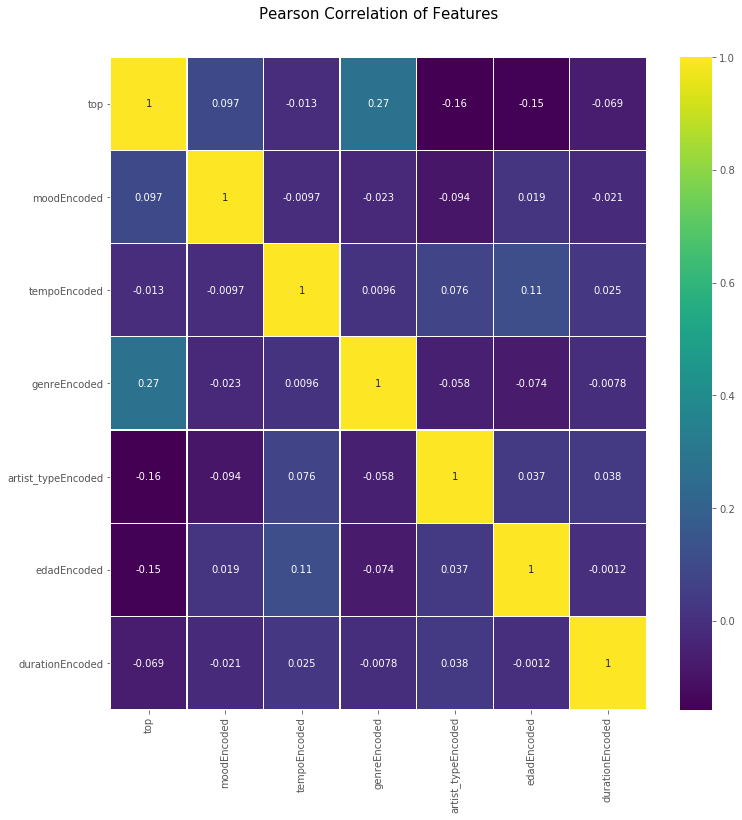

In [27]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(artists_encoded.astype(float).corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=False,
            cmap=colormap, 
            linecolor='white', 
            annot=True)

In [28]:
artists_encoded.head(5)

,top,moodEncoded,tempoEncoded,genreEncoded,artist_typeEncoded,edadEncoded,durationEncoded
id,,,,,,,
0,0,4,2,2,3,3.0,2.0
1,0,6,2,3,2,1.0,6.0
2,1,5,2,4,1,0.0,3.0
3,0,4,2,1,3,1.0,2.0
4,0,4,2,2,2,3.0,3.0


### Creamos el árbol y lo tuneamos

In [29]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(artists_encoded))
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth= depth,
                                            class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(artists_encoded):
        f_train = artists_encoded.loc[train_fold]
        f_valid = artists_encoded.loc[valid_fold]
        
        model = tree_model.fit(X=f_train.drop(['top'], axis=1),
                               y=f_train['top'])
        valid_acc = model.score(X=f_valid.drop(['top'], axis=1),
                               y=f_valid['top'])
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    
    accuracies.append(avg)
    

# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))


 Max Depth  Average Accuracy
         1          0.556101
         2          0.556126
         3          0.564038
         4          0.647247
         5          0.611136
         6          0.622148
         7          0.640947


#### Visualizacion del arbol decision



In [35]:


# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = artists_encoded['top']
x_train = artists_encoded.drop(['top'], axis=1).values 

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(artists_encoded.drop(['top'], axis=1)),
                              class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
#check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
#PImage("tree1.png")


In [37]:
acc_decision_tree = round(decision_tree.score(x_train,y_train)*100,3)
print(acc_decision_tree)

64.882


### Predección de Canciones

In [39]:
x_test = pd.DataFrame(columns=('top',
                               'moodEncoded',
                               'tempoEncoded',
                               'genreEncoded',
                               'artist_typeEncoded',
                               'edadEncoded',
                               'durationEncoded'))
x_test.loc[0] = (1,5,2,4,1,0,3)
y_pred = decision_tree.predict(x_test.drop(['top'], axis=1))
print('Prediccion: ' + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis=1))
print('Probabilidad de Acierto: ' + str(round(y_proba[0][y_pred]*100,2))+'%')

Prediccion: [1]


TypeError: type numpy.ndarray doesn't define __round__ method